In [14]:
import os
import re

import pandas as pd
import numpy as np

from matplotlib.cbook import boxplot_stats
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
import seaborn as sns

import util as util
import metrics as mt
from lamp import Lamp
from itertools import product

from itertools import combinations

# Pegar os dados do melhor modelo

In [3]:
epoch = 50
num_features = 8

In [4]:
explanation_methods = ['Integrated_Gradients',
                       'Input_X_Gradient', 
                       'SmoothGrad',
                       'Vanilla_Gradients', 
                       'Guided_Backprop',
#                        'Occlusion',
#                        'Lime', 
#                        'KernelShap',
                       'DeepLift',
#                        'ShapleyValueSampling',
          ]

In [29]:
list_combinations_methods = ["('DeepLift', 'Guided_Backprop')",
 "('DeepLift', 'Input_X_Gradient')",
 "('DeepLift', 'Integrated_Gradients')",
 "('DeepLift', 'SmoothGrad')",
 "('DeepLift', 'Vanilla_Gradients')",
 "('Guided_Backprop', 'Input_X_Gradient')",
 "('Guided_Backprop', 'Integrated_Gradients')",
 "('Guided_Backprop', 'SmoothGrad')",
 "('Guided_Backprop', 'Vanilla_Gradients')",
 "('Input_X_Gradient', 'Integrated_Gradients')",
 "('Input_X_Gradient', 'SmoothGrad')",
 "('Input_X_Gradient', 'Vanilla_Gradients')",
 "('Integrated_Gradients', 'SmoothGrad')",
 "('Integrated_Gradients', 'Vanilla_Gradients')",
 "('SmoothGrad', 'Vanilla_Gradients')"]

In [30]:
df_geral = pd.read_csv('./data/diabetes/NN/experiment_B/agreement_local_level.csv')
df_geral

,"('DeepLift', 'Guided_Backprop')","('DeepLift', 'Input_X_Gradient')","('DeepLift', 'Integrated_Gradients')","('DeepLift', 'KernelShap')","('DeepLift', 'Lime')","('DeepLift', 'Occlusion')","('DeepLift', 'SmoothGrad')","('DeepLift', 'Vanilla_Gradients')","('Guided_Backprop', 'Input_X_Gradient')","('Guided_Backprop', 'Integrated_Gradients')",...,"('Lime', 'Occlusion')","('Lime', 'SmoothGrad')","('Lime', 'Vanilla_Gradients')","('Occlusion', 'SmoothGrad')","('Occlusion', 'Vanilla_Gradients')","('SmoothGrad', 'Vanilla_Gradients')",average,metric,k,instance
0,1.00,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.00,1.000000,feature agreement,1,0.0
1,1.00,1.000,1.000,1.000,1.00,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.00,1.000000,feature agreement,1,1.0
2,0.00,0.000,0.000,1.000,0.00,0.000,1.000,1.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,1.00,0.333333,feature agreement,1,2.0
3,0.00,1.000,1.000,1.000,1.00,1.000,1.000,1.000,0.000,0.000,...,1.000,1.000,1.000,1.000,1.000,1.00,0.777778,feature agreement,1,3.0
4,0.00,1.000,1.000,1.000,1.00,1.000,0.000,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,0.000,1.00,0.500000,feature agreement,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0.00,0.500,0.625,0.375,0.25,0.500,0.125,0.125,0.000,0.000,...,0.250,0.000,0.000,0.125,0.125,1.00,0.246528,signed rank agreement,8,88.0
2972,0.00,0.375,0.500,0.500,0.25,0.375,0.375,0.375,0.000,0.000,...,0.000,0.125,0.125,0.000,0.000,1.00,0.218750,signed rank agreement,8,89.0
2973,0.25,0.000,0.000,0.375,0.00,0.000,0.000,0.000,0.000,0.000,...,0.375,0.000,0.000,0.000,0.000,1.00,0.197917,signed rank agreement,8,90.0
2974,0.25,0.500,0.500,0.625,0.50,0.500,0.375,0.375,0.125,0.125,...,0.250,0.125,0.125,0.250,0.250,0.75,0.347222,signed rank agreement,8,91.0


In [31]:
[*df_geral.k.value_counts().index]

[1, 2, 3, 4, 5, 6, 7, 8]

In [32]:
list_metrics = {
    "feature agreement": mt.feature_agreement,
    "rank agreement": mt.rank_agreement,
    "sign agreement": mt.sign_agreement,
    "signed rank agreement": mt.sign_rank_agreement,
}

In [33]:
df_geral[list_combinations_methods]

,"('DeepLift', 'Guided_Backprop')","('DeepLift', 'Input_X_Gradient')","('DeepLift', 'Integrated_Gradients')","('DeepLift', 'SmoothGrad')","('DeepLift', 'Vanilla_Gradients')","('Guided_Backprop', 'Input_X_Gradient')","('Guided_Backprop', 'Integrated_Gradients')","('Guided_Backprop', 'SmoothGrad')","('Guided_Backprop', 'Vanilla_Gradients')","('Input_X_Gradient', 'Integrated_Gradients')","('Input_X_Gradient', 'SmoothGrad')","('Input_X_Gradient', 'Vanilla_Gradients')","('Integrated_Gradients', 'SmoothGrad')","('Integrated_Gradients', 'Vanilla_Gradients')","('SmoothGrad', 'Vanilla_Gradients')"
0,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00
1,1.00,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.00
2,0.00,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.00
3,0.00,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,1.000,1.000,1.00
4,0.00,1.000,1.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2971,0.00,0.500,0.625,0.125,0.125,0.000,0.000,0.000,0.000,0.750,0.000,0.000,0.125,0.125,1.00
2972,0.00,0.375,0.500,0.375,0.375,0.000,0.000,0.000,0.000,0.125,0.000,0.000,0.125,0.125,1.00
2973,0.25,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,1.00
2974,0.25,0.500,0.500,0.375,0.375,0.125,0.125,0.000,0.000,1.000,0.125,0.125,0.125,0.125,0.75


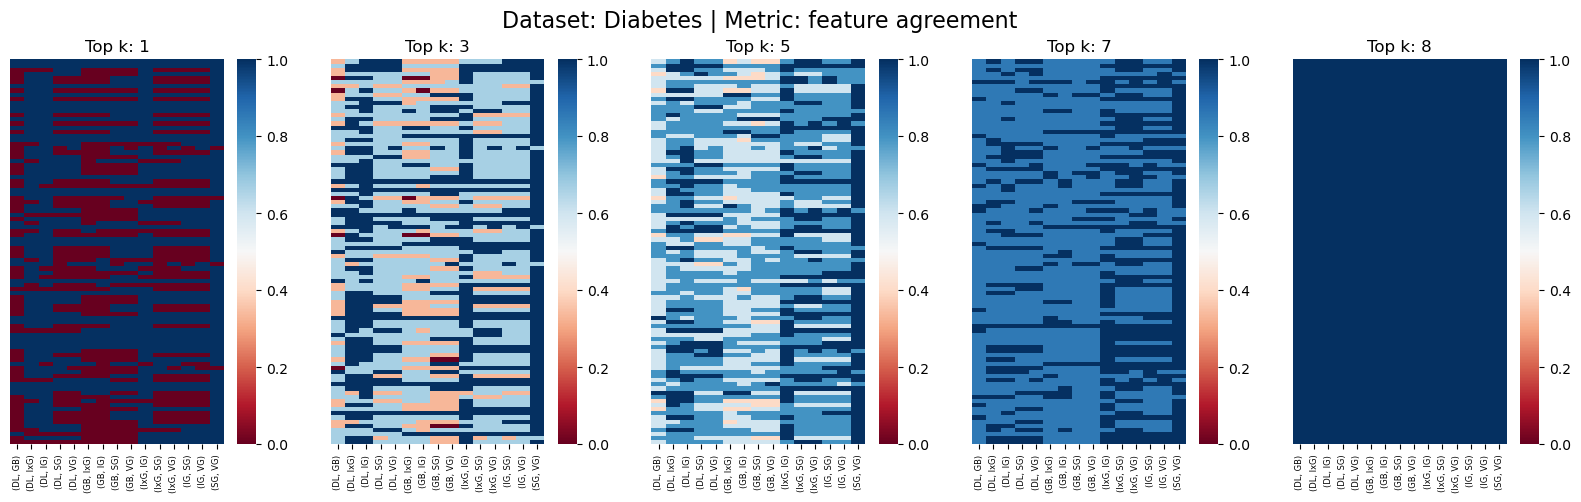

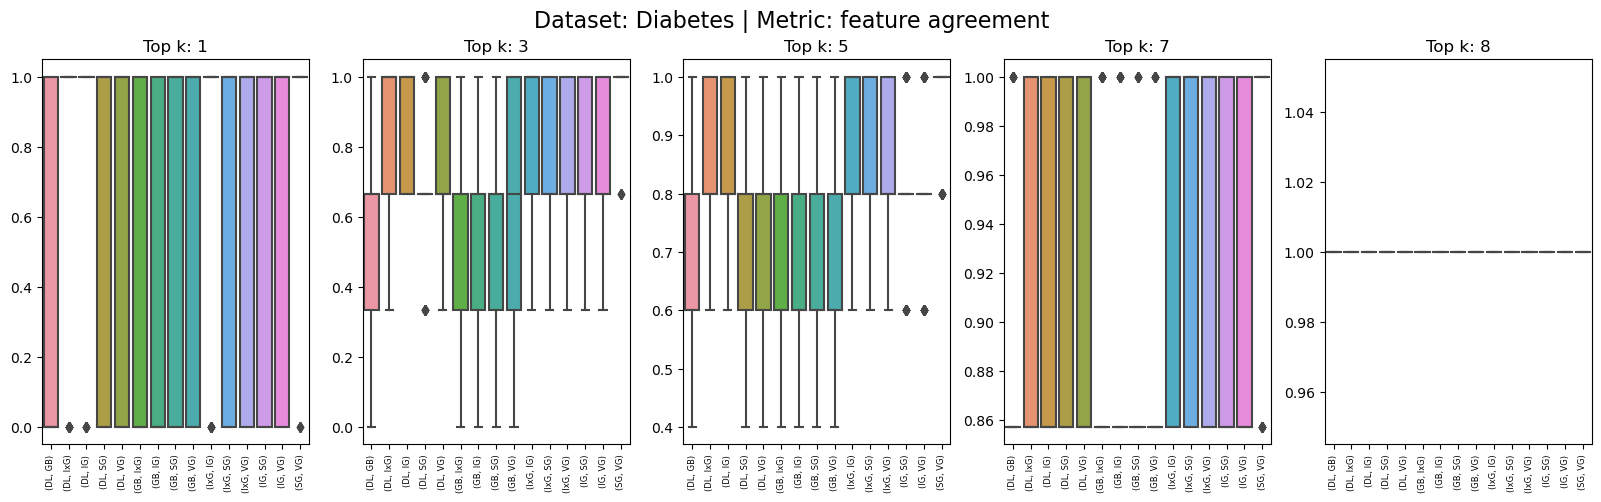

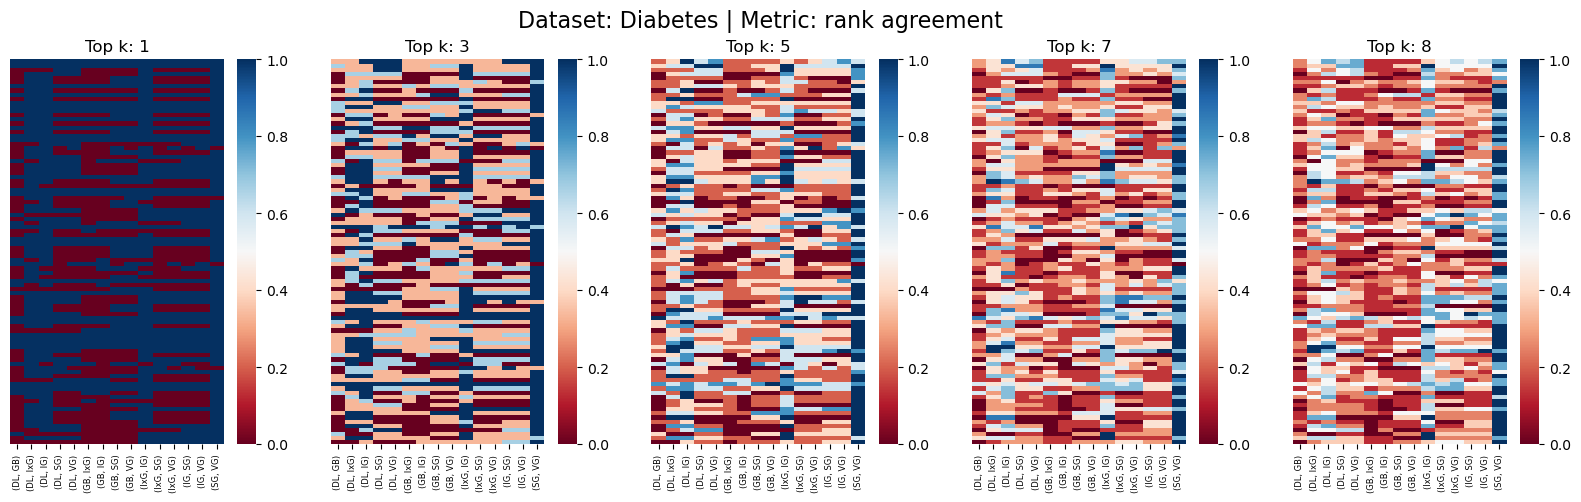

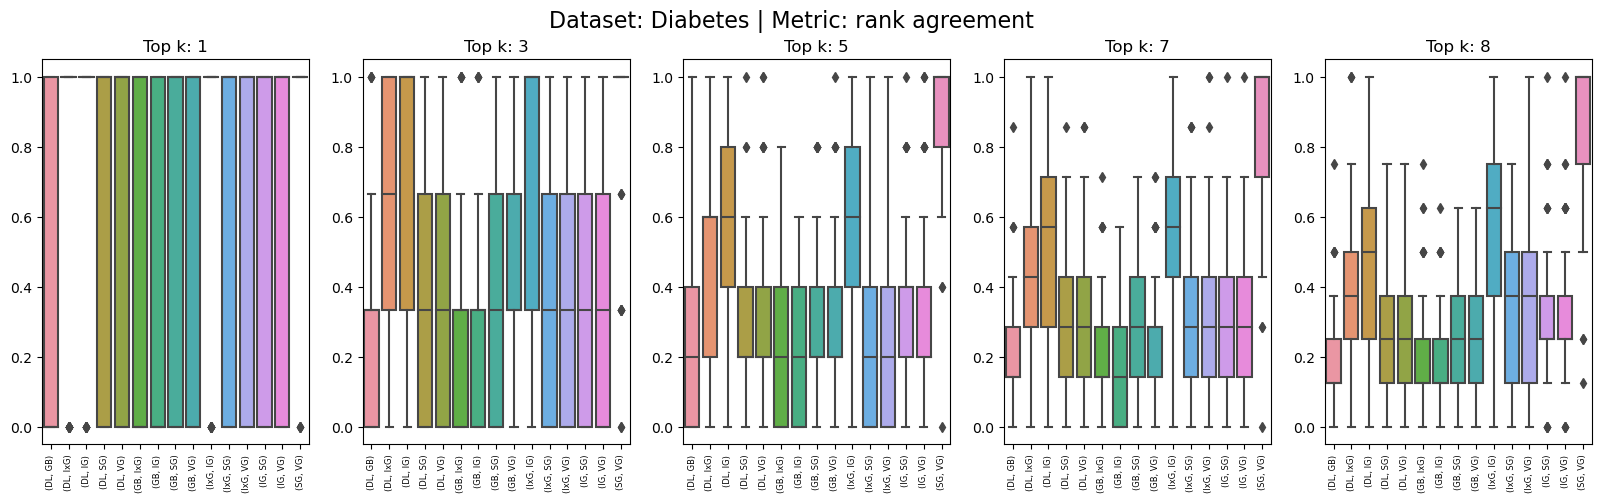

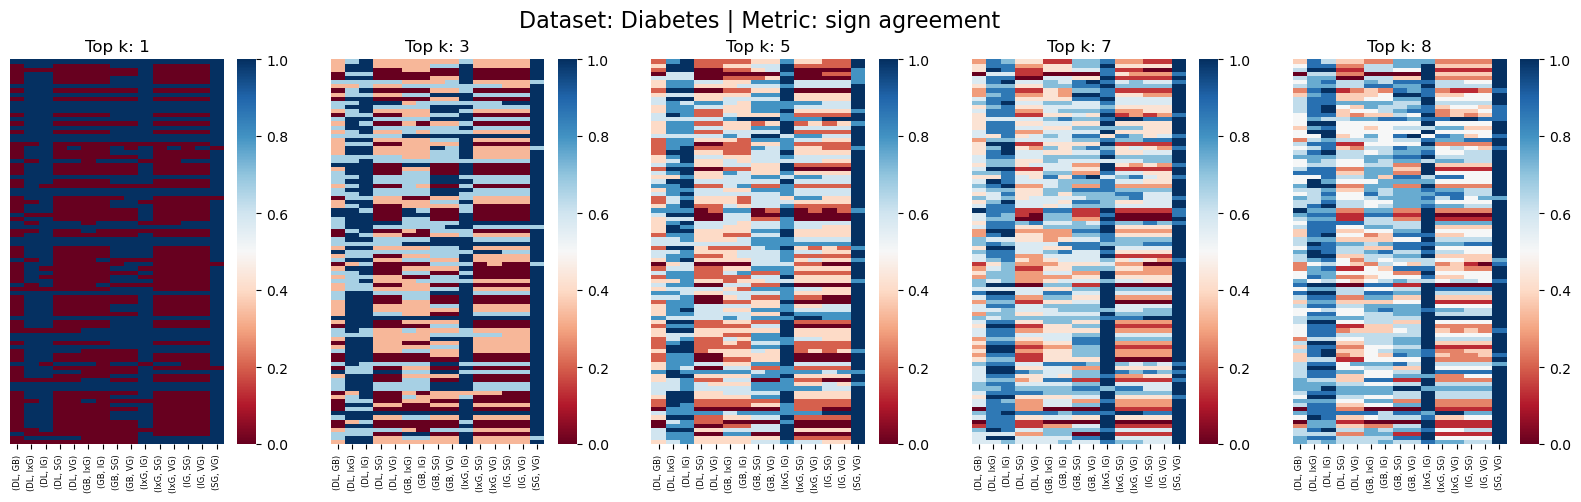

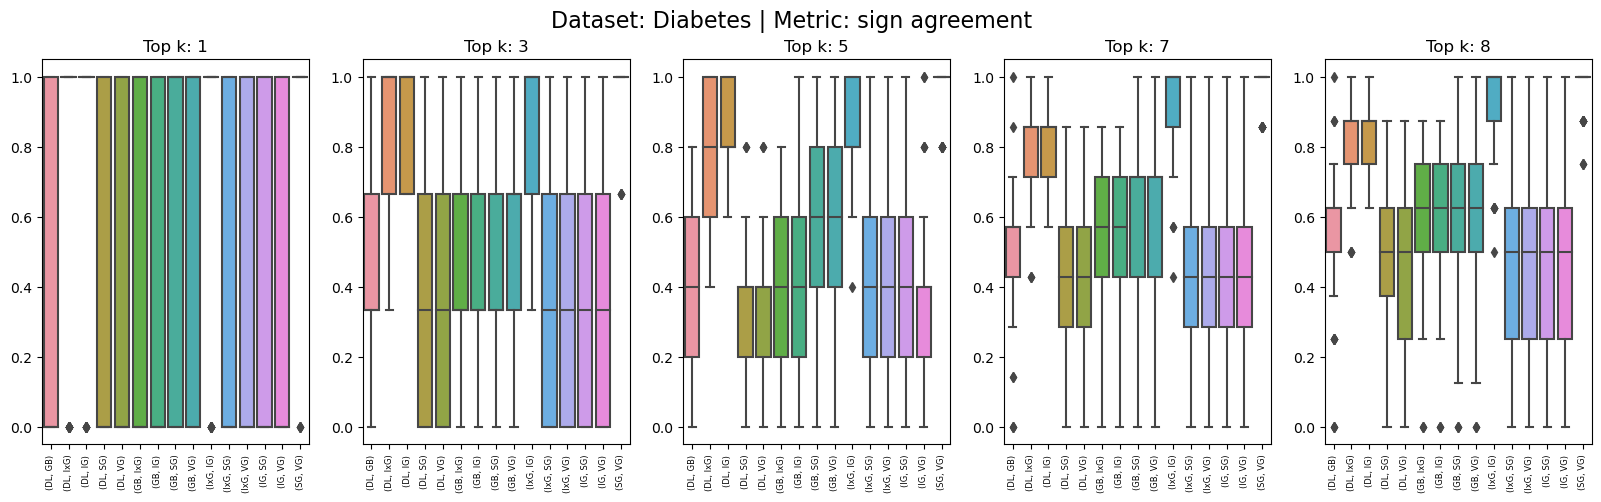

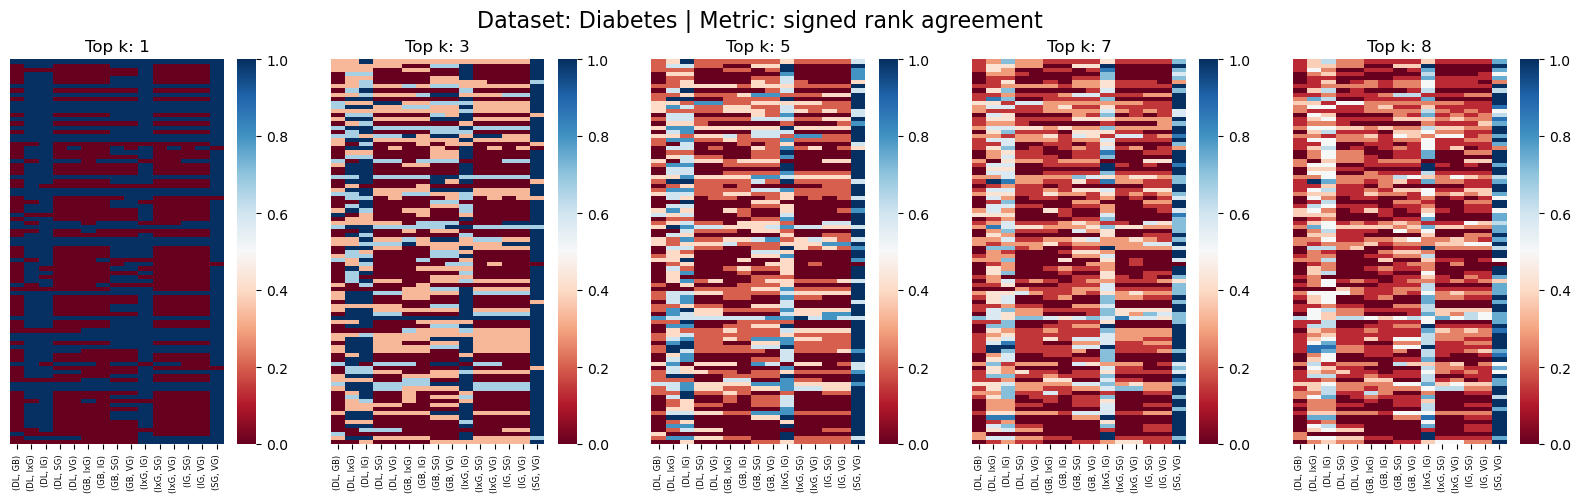

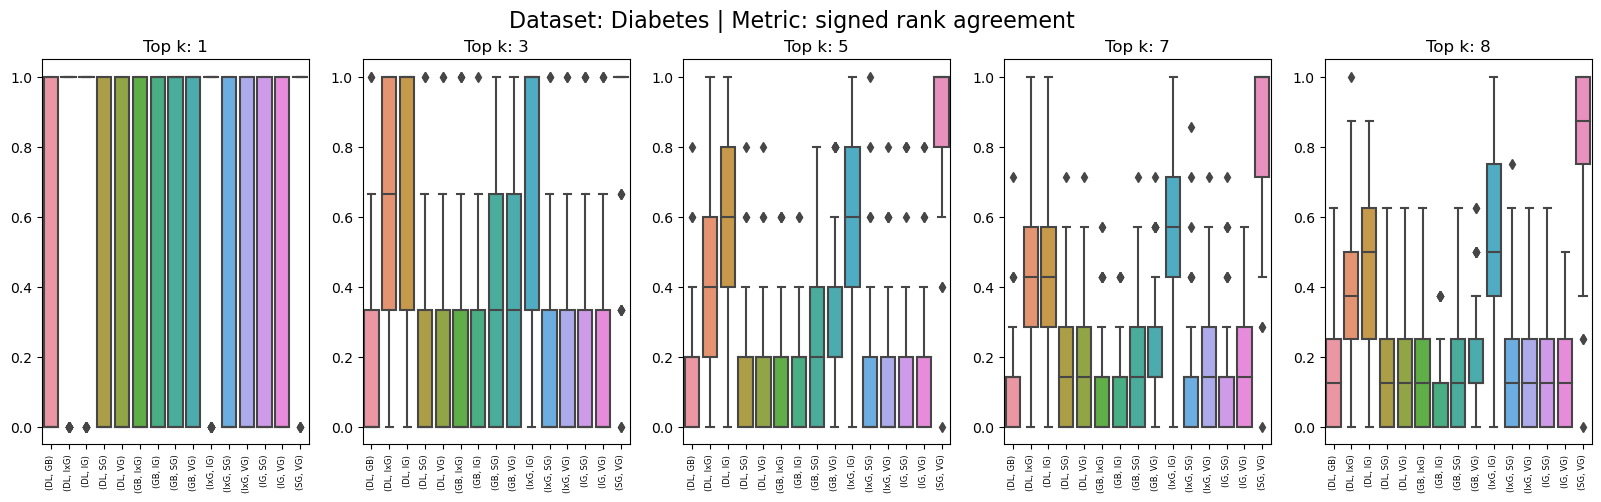

In [49]:
selected_methods = explanation_methods

dfs = {}

for metric_name, selected_metric in list_metrics.items():
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    fig_boxplot, axs_boxplot = plt.subplots(1, 5, figsize=(20, 5))
    
    i = 0
    df_k = {}
    for selected_k in [1,3,5,7,8]:
        xticklabels = ['(DL, GB)', '(DL, IxG)', '(DL, IG)', '(DL, SG)', '(DL, VG)',
       '(GB, IxG)', '(GB, IG)', '(GB, SG)', '(GB, VG)', '(IxG, IG)',
       '(IxG, SG)', '(IxG, VG)', '(IG, SG)', '(IG, VG)', '(SG, VG)']
        
        df = df_geral[(df_geral['metric'] == metric_name) & (df_geral['k'] == selected_k)]
        df = df[list_combinations_methods]
        
        df_k[selected_k] = df
        
        sns.heatmap(df, cmap='RdBu', ax=axs[i], vmax=1, vmin=0, xticklabels=xticklabels)
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90, fontsize = 6)
        axs[i].get_yaxis().set_visible(False)
        axs[i].set_title('Top k: ' + str(selected_k))        
        
        sns.boxplot(data=df, ax=axs_boxplot[i])
        axs_boxplot[i].set_title('Top k: ' + str(selected_k))      
        axs_boxplot[i].set_xticklabels(xticklabels, rotation = 90, fontsize = 6)
        
        i+=1
    
    dfs[metric_name] = df_k
    
    fig.suptitle('Dataset: Diabetes | Metric: ' + metric_name, fontsize=16)
    fig.savefig('./data/diabetes/NN/experiment_C/gradient_based/heatmaps/' + metric_name +'_heatmap_gb_.png', dpi=300)    
    
    fig_boxplot.suptitle('Dataset: Diabetes | Metric: ' + metric_name, fontsize=16)
    fig_boxplot.savefig('./data/diabetes/NN/experiment_C/gradient_based/boxplots/' + metric_name +'_boxplot_gb_.png', dpi=300)

# Permutation

In [65]:
explanation_methods = [
                       'Occlusion',
                       'Lime', 
                       'KernelShap'
          ]

In [66]:
list_combinations_methods = [
 "('KernelShap', 'Lime')",
 "('KernelShap', 'Occlusion')",
 "('Lime', 'Occlusion')",
                            ]

In [64]:
# [*df_geral.columns]

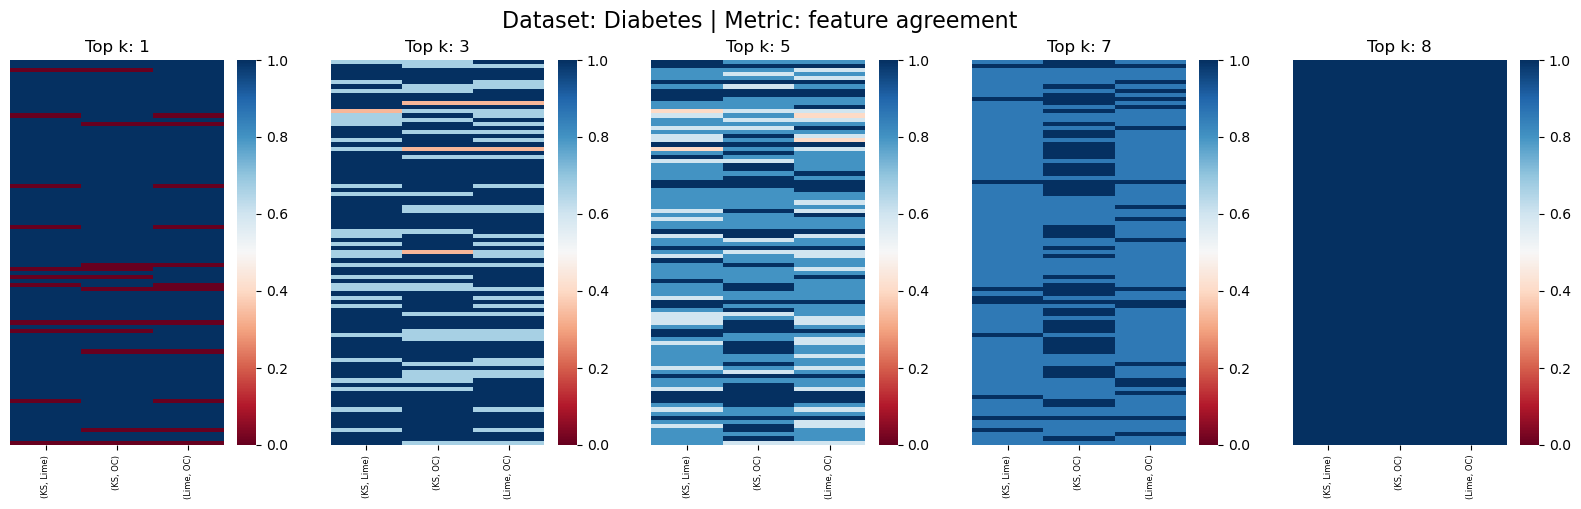

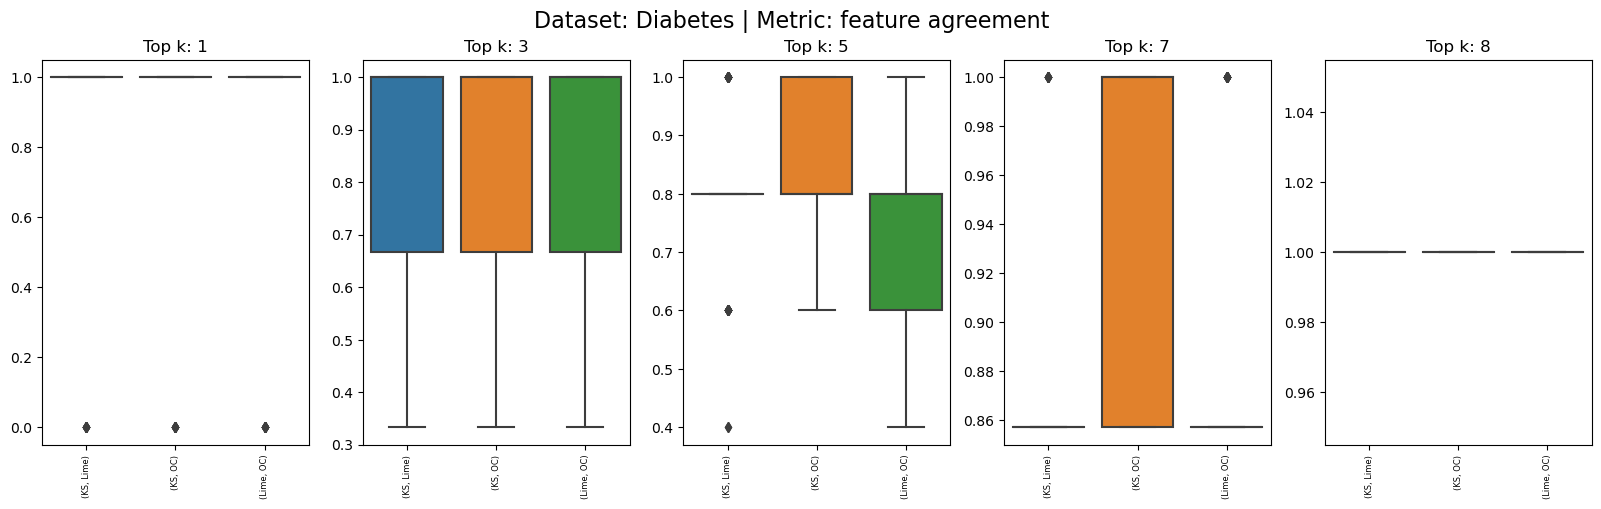

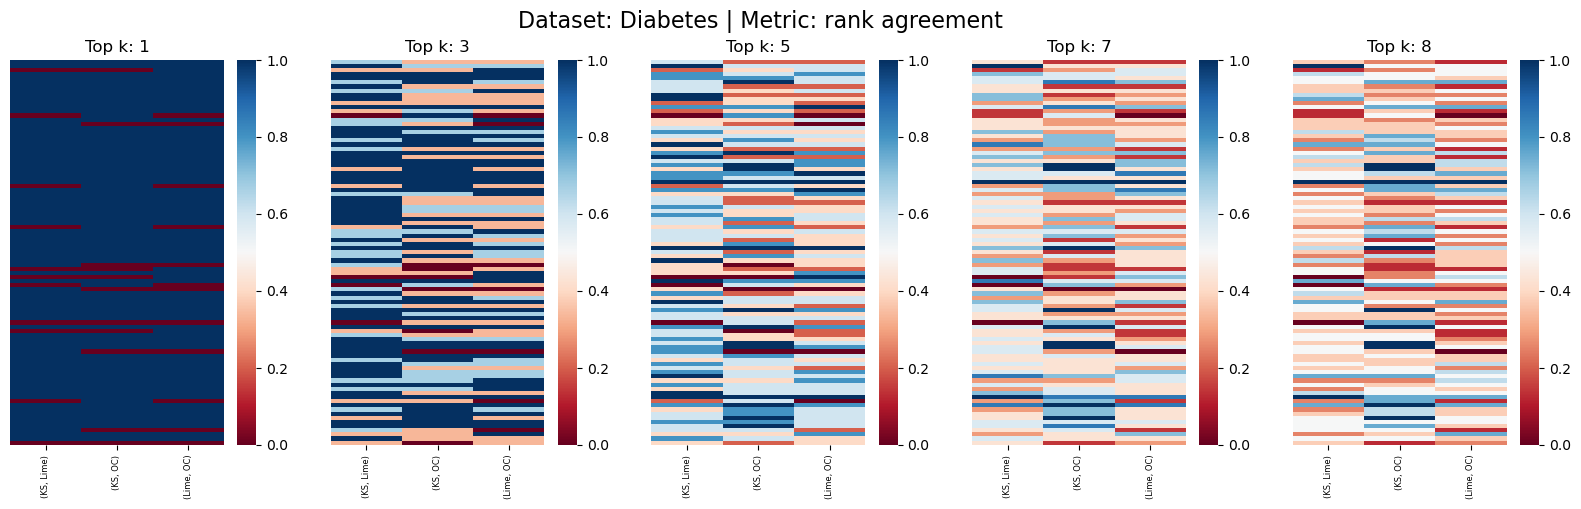

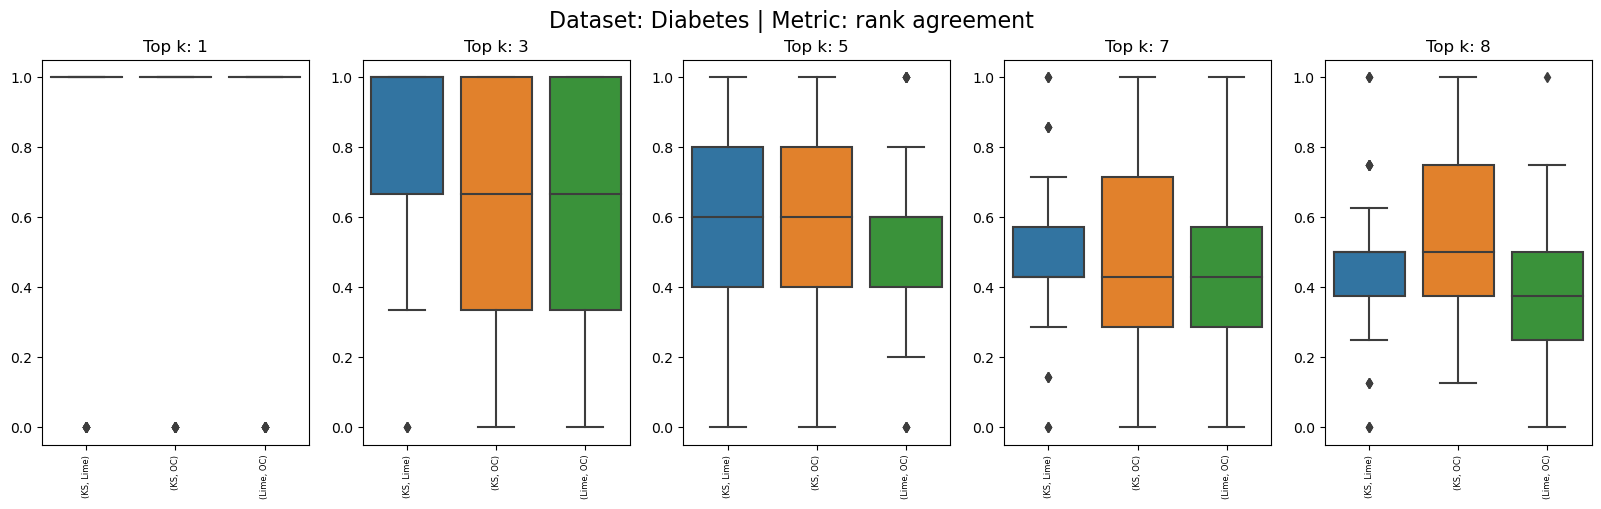

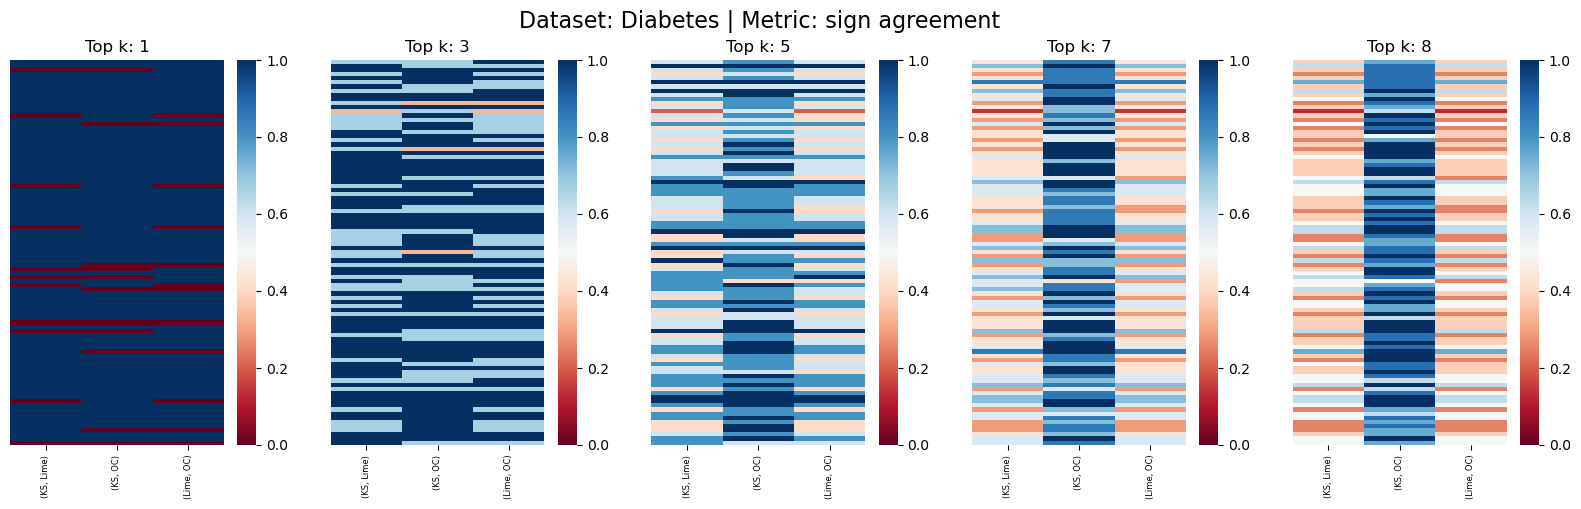

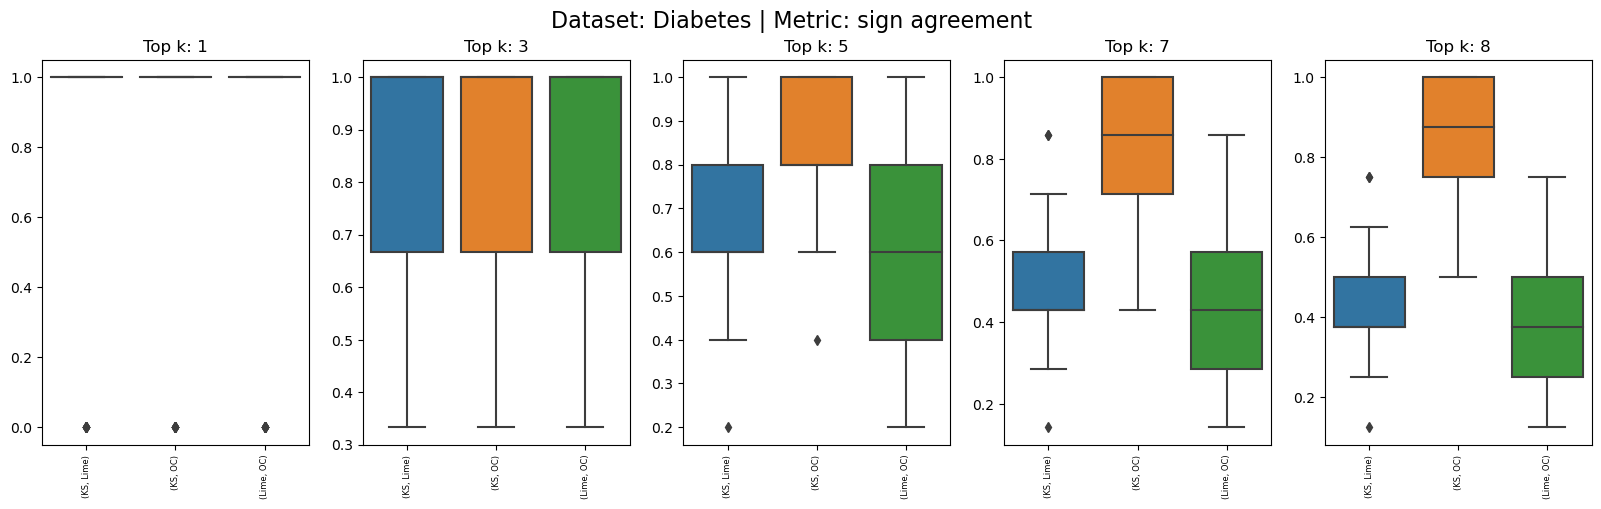

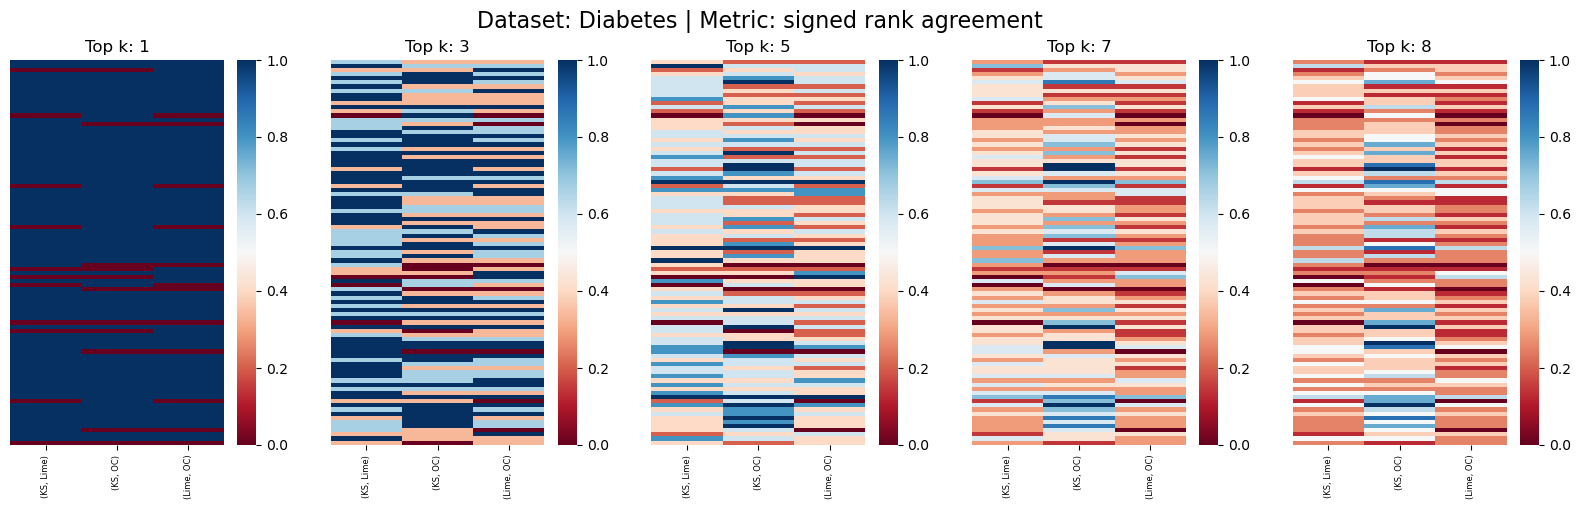

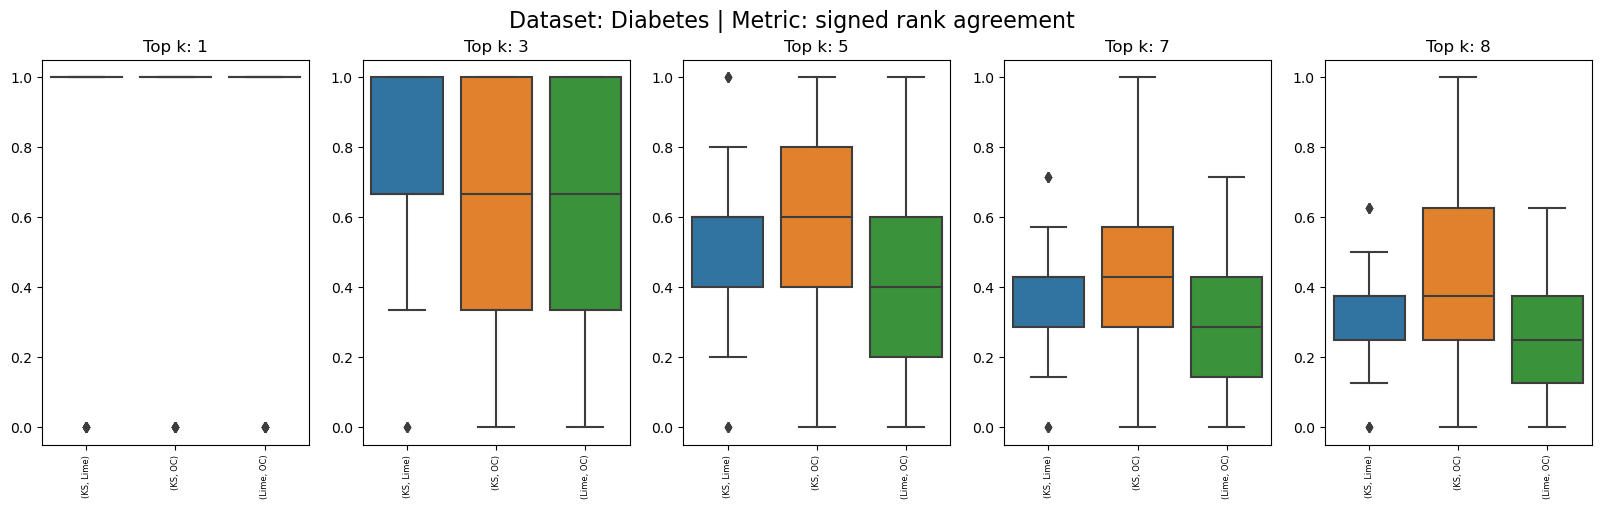

In [70]:
selected_methods = explanation_methods

dfs = {}

for metric_name, selected_metric in list_metrics.items():
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    fig_boxplot, axs_boxplot = plt.subplots(1, 5, figsize=(20, 5))
    
    i = 0
    df_k = {}
    for selected_k in [1,3,5,7,8]:
        xticklabels = ['(KS, Lime)', '(KS, OC)', '(Lime, OC)']
        
        df = df_geral[(df_geral['metric'] == metric_name) & (df_geral['k'] == selected_k)]
        df = df[list_combinations_methods]
        
        
        df_k[selected_k] = df
        
        sns.heatmap(df, cmap='RdBu', ax=axs[i], vmax=1, vmin=0, xticklabels=xticklabels)
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90, fontsize = 6)
        axs[i].get_yaxis().set_visible(False)
        axs[i].set_title('Top k: ' + str(selected_k))        
        
        sns.boxplot(data=df, ax=axs_boxplot[i])
        axs_boxplot[i].set_title('Top k: ' + str(selected_k))      
        axs_boxplot[i].set_xticklabels(xticklabels, rotation = 90, fontsize = 6)
        
        i+=1
    
    dfs[metric_name] = df_k
    
    fig.suptitle('Dataset: Diabetes | Metric: ' + metric_name, fontsize=16)
    fig.savefig('./data/diabetes/NN/experiment_C/pertubration_based/heatmaps/' + metric_name +'_heatmap_mg_.png', dpi=300)    
    
    fig_boxplot.suptitle('Dataset: Diabetes | Metric: ' + metric_name, fontsize=16)
    fig_boxplot.savefig('./data/diabetes/NN/experiment_C/pertubration_based/boxplots/' + metric_name +'_boxplot_mg_.png', dpi=300)